### Ejemplo Regresión logística

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
cd H:\Curso IBM sobre IA\Archivos para Data Science

H:\Curso IBM sobre IA\Archivos para Data Science


h:\Ejercicios Python\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
pwd

'H:\\Curso IBM sobre IA\\Archivos para Data Science'

In [7]:
entrenamiento = pd.read_csv('train.csv')

In [8]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
entrenamiento.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

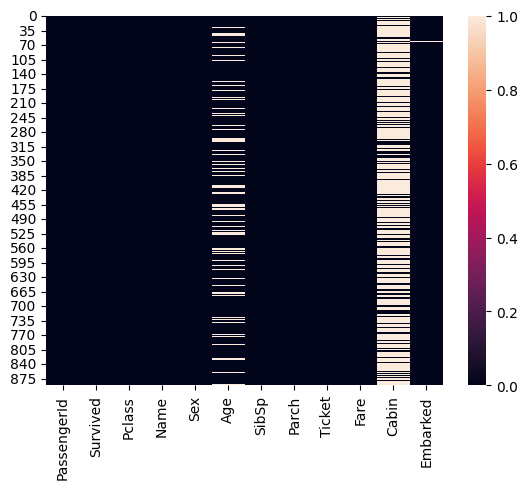

In [10]:
sns.heatmap(entrenamiento.isnull())

<Axes: xlabel='Survived', ylabel='count'>

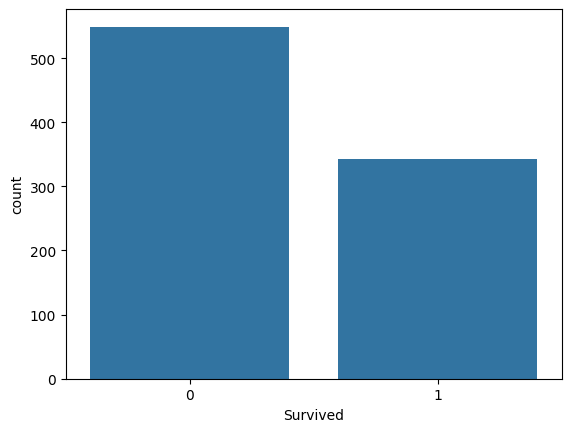

In [11]:
sns.countplot(x='Survived', data=entrenamiento)

<Axes: xlabel='Survived', ylabel='count'>

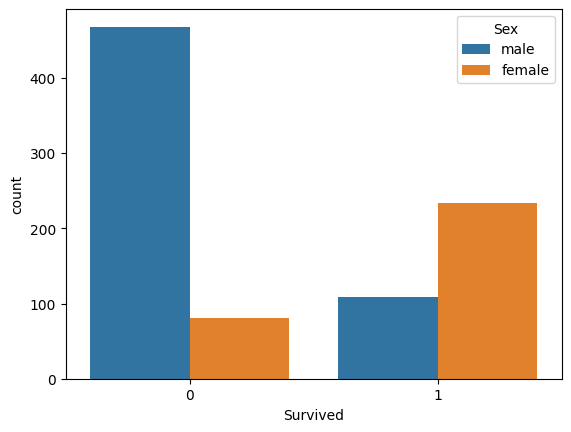

In [12]:
sns.countplot(x='Survived', data=entrenamiento, hue='Sex')

In [13]:
entrenamiento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

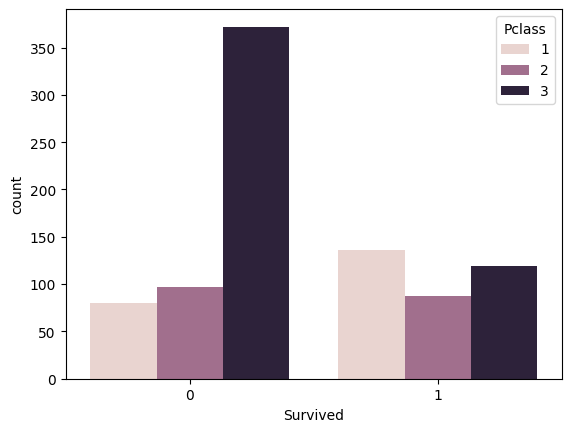

In [14]:
sns.countplot(x='Survived', data=entrenamiento, hue='Pclass')

C:\Users\Marru\AppData\Local\Temp\ipykernel_6484\306444277.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(entrenamiento['Age'].dropna(), kde=False, bins=30)


<Axes: xlabel='Age'>

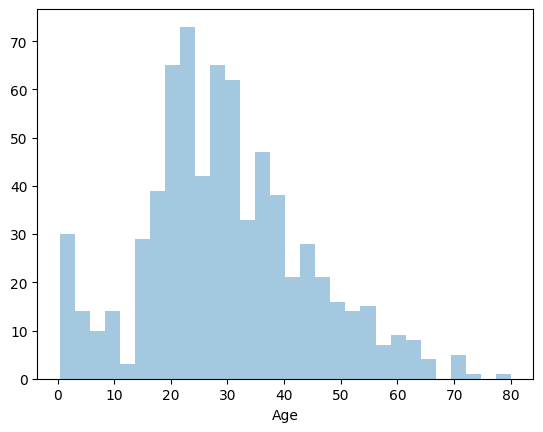

In [15]:
sns.distplot(entrenamiento['Age'].dropna(), kde=False, bins=30)

<Axes: ylabel='Frequency'>

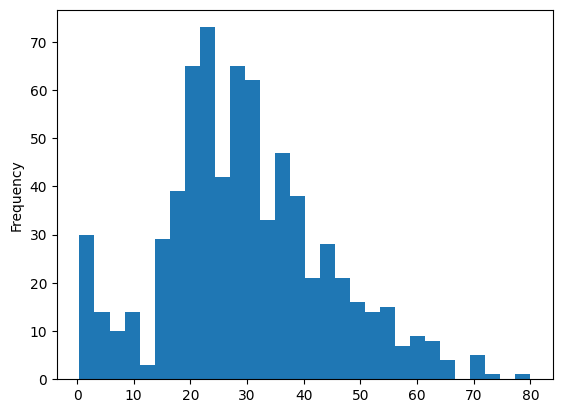

In [16]:
entrenamiento['Age'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

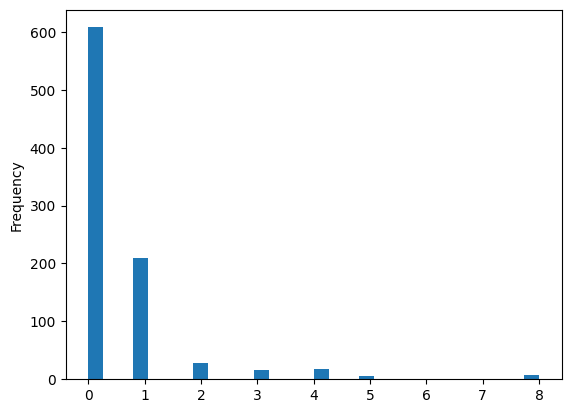

In [17]:
entrenamiento['SibSp'].plot.hist(bins=30)

In [33]:
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [22]:
cf.go_offline()
init_notebook_mode(connected=True)

In [34]:
fig = px.histogram(entrenamiento, x='Fare', nbins=40)
fig.show()

### Limpieza de datos

<Axes: >

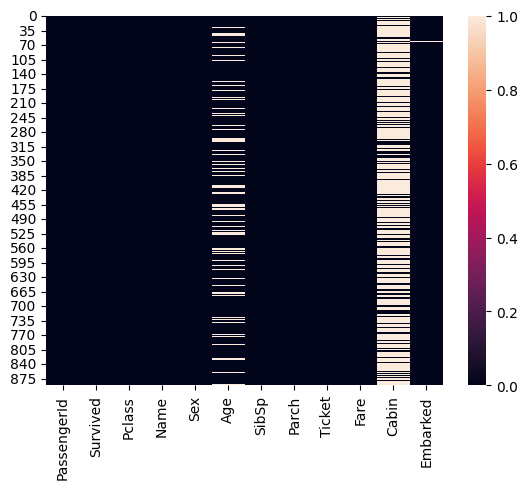

In [35]:
entrenamiento.isnull
sns.heatmap(entrenamiento.isnull())

<Axes: xlabel='Pclass', ylabel='Age'>

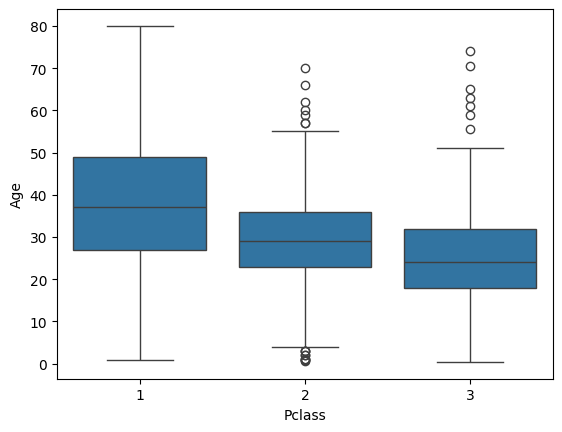

In [36]:
sns.boxplot(x='Pclass', y='Age', data=entrenamiento)

In [37]:
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25
    else:
        return edad

In [38]:
entrenamiento['Age'] = entrenamiento[['Age', 'Pclass']].apply(edad_media, axis=1)

C:\Users\Marru\AppData\Local\Temp\ipykernel_6484\174071754.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Marru\AppData\Local\Temp\ipykernel_6484\174071754.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

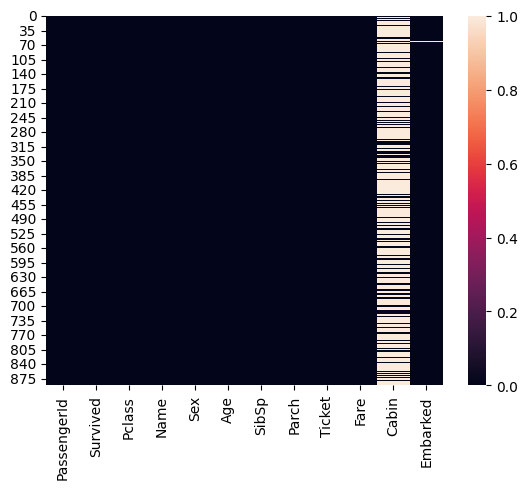

In [39]:
entrenamiento.isnull
sns.heatmap(entrenamiento.isnull())

In [40]:
entrenamiento.drop('Cabin', axis=1, inplace=True)

<Axes: >

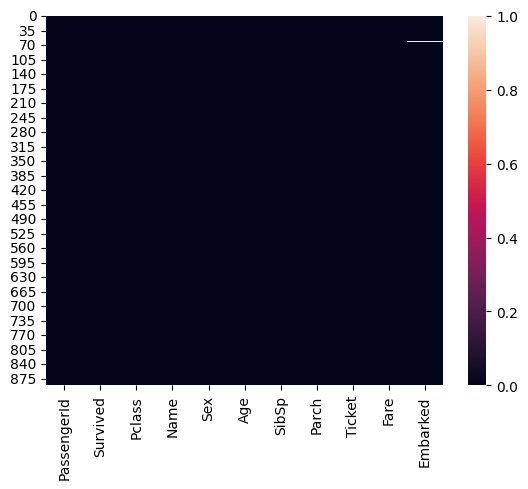

In [42]:
entrenamiento.isnull
sns.heatmap(entrenamiento.isnull())

In [44]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [45]:
entrenamiento.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

<Axes: >

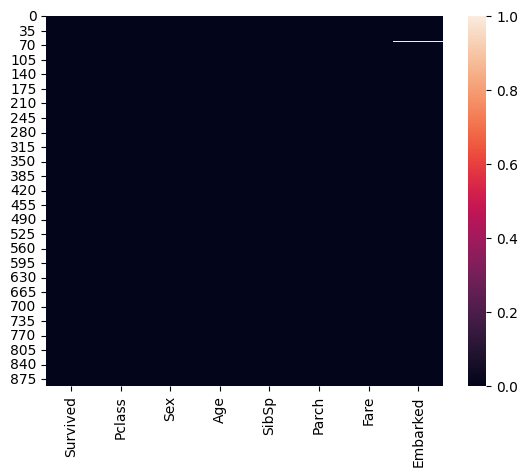

In [46]:
entrenamiento.isnull
sns.heatmap(entrenamiento.isnull())

In [55]:
sexo = pd.get_dummies(entrenamiento['Sex'], drop_first=True).astype(int)
sexo

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [56]:
entrenamiento = pd.concat([entrenamiento, sexo], axis=1)

In [57]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [58]:
entrenamiento.drop('Sex', axis=1, inplace=True)

In [59]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [60]:
puerto = pd.get_dummies(entrenamiento['Embarked'], drop_first=True).astype(int)

In [61]:
puerto

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [62]:
entrenamiento = pd.concat([entrenamiento, puerto], axis=1)

In [63]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [64]:
entrenamiento.drop('Embarked', axis=1, inplace=True)

In [65]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Entrenamiento del modelo

In [66]:
y = entrenamiento['Survived']
X = entrenamiento.drop('Survived', axis=1)

In [67]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=45)

In [70]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
650,3,25.0,0,0,7.8958,1,0,1
784,3,25.0,0,0,7.0500,1,0,1
125,3,12.0,1,0,11.2417,1,0,0
54,1,65.0,0,1,61.9792,1,0,0
446,2,13.0,0,1,19.5000,0,0,1
...,...,...,...,...,...,...,...,...
725,3,20.0,0,0,8.6625,1,0,1
607,1,27.0,0,0,30.5000,1,0,1
544,1,50.0,1,0,106.4250,1,0,0
643,3,25.0,0,0,56.4958,1,0,1


In [71]:
from sklearn.linear_model import LogisticRegression

In [73]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

h:\Ejercicios Python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [74]:
predicciones = modelo.predict(X_test)

In [75]:
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [76]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
422    0
815    0
466    0
559    1
6      0
Name: Survived, Length: 268, dtype: int64

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[153,  25],
       [ 21,  69]])